<a href="https://colab.research.google.com/github/hesoyamm/indian_startup_analysis/blob/master/Copy_of_IndianSTARTUP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### analyzing the growth of Indian Startups

#### i will try to comment each cell , what i find usefull is revising the older projects when it comes to data science so commenting helps you move things along faster. 
anyone who reads this , i hope it helps



   

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
##for data visulatization

In [ ]:
##lets select a background style , not important just for representation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(36,7)

In [ ]:
#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

## reading the data

In [ ]:
data = pd.read_csv('startup_funding.csv')

In [ ]:
#changing the names of the  columns inside the data 
print(data)

      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

In [ ]:
data.columns =['Sno','Data','StartupName','Industryvertical','SubVertical','City','InvestorSName','InvestmentType','AmountInUSD','Remarks']

In [ ]:
#lets clean the strings
def clean_string(x):
    return str(x).replace('\\xc2\\xa0','').replace('\\\\xc2\\\\xa0','')
## if you dont understand what happended here go to this url:https://stackoverflow.com/questions/10993612/how-to-remove-xa0-from-string-in-python

In [ ]:
#lets apply the function to clean the data
for col in [
'StartupName','Industryvertical','SubVertical','City','InvestorSName','InvestmentType','AmountInUSD','Remarks']:
    data[col] = data[col].apply(lambda x:clean_string(x))
#lambda function is very uselfull for data cleaning purposes so pandas has an function called .apply() in which pandas performs the task for all x . for more infor refer url:https://medium.com/@chaimgluck1/have-messy-text-data-clean-it-with-simple-lambda-functions-645918fcc2fc    

#lets check the head of the data
data.head()

,Sno,Data,StartupName,Industryvertical,SubVertical,City,InvestorSName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


### data cleaning 

In [ ]:
import warnings 
warnings.filterwarnings('ignore') 
## i dont think i need to expalin this.

In [ ]:
#lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending =False)


In [ ]:
#percentage of missing data 
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending =False)

In [ ]:
#for representation point of view i will stopre the two values in a dataset called missing_data
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent %'])

In [ ]:
#lets check the head of the data
missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorSName,0,0.0
City,0,0.0
SubVertical,0,0.0
Industryvertical,0,0.0
StartupName,0,0.0
Data,0,0.0
Sno,0,0.0


In [ ]:
#lets check the values in the remark column
data['Remarks'].value_counts()

nan                                          2625
Series A                                      177
Series B                                       64
Pre-Series A                                   37
Series C                                       28
                                             ... 
Series E                                        1
Additional investment from parent company       1
Pre-Series Bridge                               1
pre Series-A                                    1
Strategic Investment (25% stake)                1
Name: Remarks, Length: 70, dtype: int64

In [ ]:
##AS YOU CAN OBSERVE REMARK HAS LOT OP NAN AND HIGH CORNDINAL VALUES
data = data.drop(['Remarks'],axis=1)


In [ ]:
data.columns

Index(['Sno', 'Data', 'StartupName', 'Industryvertical', 'SubVertical', 'City',
       'InvestorSName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [ ]:
print(data['AmountInUSD'])

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042             nan
3043        1,40,000
Name: AmountInUSD, Length: 3044, dtype: object


In [ ]:
### now this is little bit tricky u need to observe how the amount value is stored in the columnd AmountinUsd
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    #we are replacing each anomaly with empty string ""
    x=str(x).replace(",","").replace("+","")
    x=str(x).lower().replace("ubdisclosed","")
    x=str(x).lower().replace("n/a","")
    if x == '':
        x = '-9'
    return x
##now the -999 is to label that a startup has not got any funding


In [ ]:
#lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x:float(clean_amount(x)))
print(data['AmountInUSD'])





0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042           -9.0
3043       140000.0
Name: AmountInUSD, Length: 3044, dtype: float64


## WORD OF ADVICE
*if you dont understand the last two cells you need to read up on DATA CLEANING
## some say Data scientist spend 70 to 80% of there time cleaning data 
so here are some resources to help you out 
### for learning
https://realpython.com/python-data-cleaning-numpy-pandas/
### for practising 
https://analyticsindiamag.com/10-datasets-for-data-cleaning-practice-for-beginners/


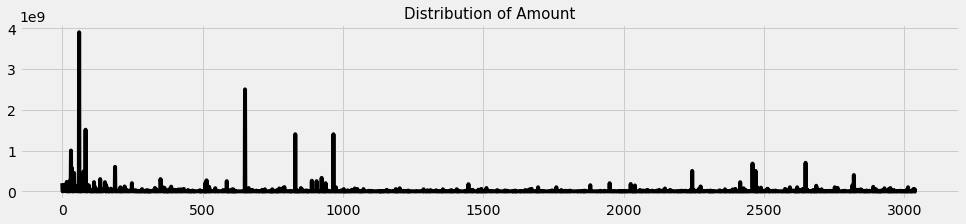

In [ ]:
#lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15,3)
data['AmountInUSD'].plot(kind='line',color ='black')
plt.title('Distribution of Amount',fontsize =15)
plt.show()

## cleaning the dates
---this is hard labour simply put


In [ ]:
print(data['Data'].head())

0    09/01/2020
1    13/01/2020
2    09/01/2020
3    02/01/2020
4    02/01/2020
Name: Data, dtype: object


In [ ]:
data['Data'].dtype
## note 
## When you see dtype('O') inside dataframe this means Pandas string.

dtype('O')

In [ ]:
data['Data'][data['Data'] =='12/05.2015']='12/05/2015'
data['Data'][data['Data'] == '13/04.2015']='13/04/2015'
data['Data'][data['Data'] == '15/01.2015'] ='15/01/2015'
data['Data'][data['Data'] == '22/01//2015'] ='22/01/2015'
data['Data'][data['Data'] == '05/072018']='05/07/2018'
data['Data'][data['Data'] == '01/07/015'] ='01/07/2015'
data['Data'][data['Data'] == '\\\\xc2\\\\xa010/7/2015'] ='10/07/2015'
###how did i know which one of them is not right , refer the next code cell if something is not formated correctly it will give the error below 


![image.png](attachment:48796b1d-f040-4922-a373-ea0968f3be0e.png)

# querying the data using visualization
"

### how does the funding ecosystem changes with respect to Time?

In [ ]:
#converting them into a Datetime object
data['yearmonth'] = (pd.to_datetime(data['Data'],
                                   format="%d/%m/%Y").dt.year*100)+(pd.to_datetime(data['Data'],format = "%d/%m/%Y").dt.month)
print(data['yearmonth'])


0       202001
1       202001
2       202001
3       202001
4       202001
         ...  
3039    201501
3040    201501
3041    201501
3042    201501
3043    201501
Name: yearmonth, Length: 3044, dtype: int64


#### how did i know how to use the above method ?
refer:https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates

In [ ]:
temp=data['yearmonth'].value_counts().sort_values(ascending =False).head(10)

In [ ]:
print("No. of funding per month in decreasing order (TOp 10)\n",temp)

No. of funding per month in decreasing order (TOp 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


In [ ]:
year_month = data['yearmonth'].value_counts()

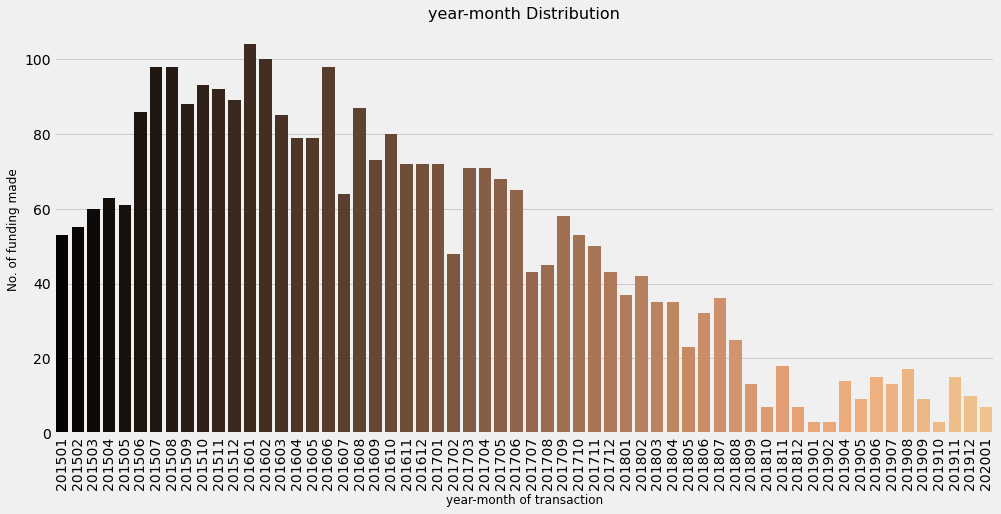

In [ ]:
#lets plot the data
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(year_month.index,year_month.values,palette= 'copper')
plt.xticks(rotation =90)
plt.xlabel('year-month of transaction',fontsize=12)
plt.ylabel('No. of funding made',fontsize=12)
plt.title('year-month Distribution',fontsize=16)
plt.show()

### analyse the above graph
-one the major thing aspiring data scientist ignore is anaylsis part. They are all into understadnign the code which is fine and well but its not what should be the outcome , your outcome should be to learn from the data , that why industry pay so much amount to data visualizer engineers(i mean crazy money).


** in 2015-16 investments were on high rise and since then the funding has only decreased.(that sucks)

In [ ]:
#lets check the maximum funding of a startup
print("maximum funding to a startup is :",data['AmountInUSD'].dropna().sort_values().max())

maximum funding to a startup is : 3900000000.0


In [ ]:
#lets check the startips with more than 50crore+ funding
@interact
def check(column = 'AmountInUSD', x= 50000):#50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'AmountInUSD',ascending =False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=50000, description='x',…

In [ ]:
# lets check out different ventures of PATYM
data[data.StartupName=='Paytm']

,Sno,Data,StartupName,Industryvertical,SubVertical,City,InvestorSName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.000000e+00,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.000000e+00,201502


In [ ]:
#lets check the minimum funding in a startup
print('Minimum funding to a Startup is :',data['AmountInUSD'].dropna().sort_values().min())

Minimum funding to a Startup is : -9.0


In [ ]:
#lets check the startups with least funding 
data[['AmountInUSD','StartupName']].sort_values(by= 'AmountInUSD',ascending=True).head(5)

,AmountInUSD,StartupName
2125,-9.0,Splitkart
1464,-9.0,TAC Security
708,-9.0,FableStreet
709,-9.0,Monsoon Fintech
710,-9.0,MonkeyBox


### analysis time

--- making the startups getting zero funding as a constant helped out sorting least funded startups


---in cell above observe different venture capital investments for paytm over the years

In [ ]:
data[data["AmountInUSD"]==99900.0].shape

(0, 10)

In [ ]:
#average funding
print("ON average Indian startup got funding of: ",data['AmountInUSD'].dropna().sort_values().mean())

ON average Indian startup got funding of:  13270374.059461236


In [ ]:
#lets check the no. of funding each startups got 
#remeber i told you representation is everything when it comes to data analysis, you are showing to someone for them to believe in your conclusion
#make it trendy 
print("total startups funded:" , len(data["StartupName"].unique()))


total startups funded: 2457


In [ ]:
print(data['StartupName'].value_counts().head(20))

##initalizing the variable for splitting purpose.
startupname= data['StartupName'].value_counts().head(20)

Ola Cabs         8
Swiggy           8
Paytm            7
UrbanClap        6
Nykaa            6
Meesho           6
NoBroker         6
Medinfi          6
Jugnoo           5
Capital Float    5
Moglix           5
Flipkart         5
Uniphore         5
Grofers          5
Toppr            5
Indus OS         4
Fynd             4
Aye Finance      4
Udaan            4
TinyStep         4
Name: StartupName, dtype: int64


In [ ]:
##if you didn't understand what happende in the above code refer this:
y=startupname.index
print(y)
x=startupname.values
print(x)

Index(['Ola Cabs', 'Swiggy', 'Paytm', 'UrbanClap', 'Nykaa', 'Meesho',
       'NoBroker', 'Medinfi', 'Jugnoo', 'Capital Float', 'Moglix', 'Flipkart',
       'Uniphore', 'Grofers', 'Toppr', 'Indus OS', 'Fynd', 'Aye Finance',
       'Udaan', 'TinyStep'],
      dtype='object')
[8 8 7 6 6 6 6 6 5 5 5 5 5 5 5 4 4 4 4 4]


#### main reason people use data visualization is it removes the mundane out of the equation , the above cell and the below show the same thing but in a different manner.

--swiggy has been funded 8 times , paytm 7 and so on..


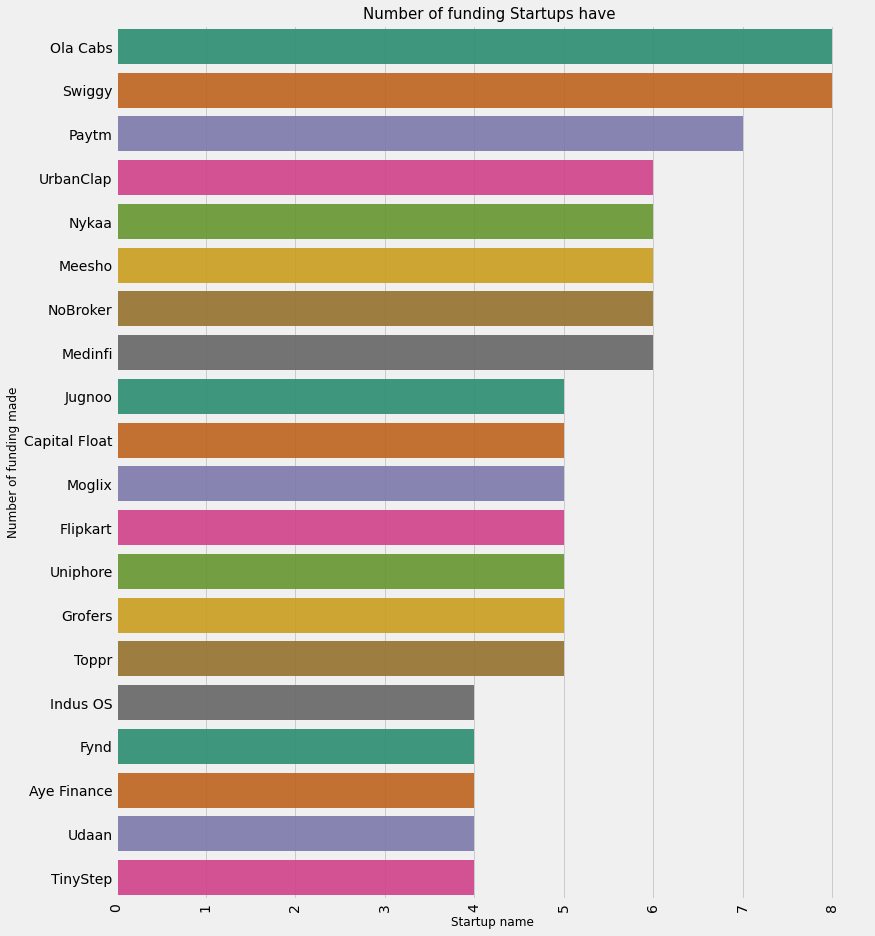

In [ ]:
#lets plot the data
plt.rcParams['figure.figsize'] = (12,15)
sns.barplot(y=startupname.index,x=startupname.values,alpha =0.9,palette='Dark2')
#When using seaborn barplot I can specify an alpha for which it makes the bars semi-translucent

plt.xticks(rotation = 'vertical')
plt.xlabel('Startup name',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Number of funding Startups have ',fontsize=15)
plt.show()


### seaborn

--right now i am doing all my visualization through seaborn but there are many more packages but this is simplest to use.


--if you dont understand the code for sns(seaborn) refer this :https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sh\eet.pdf

### what kind of industries are more prefered for startups?

In [ ]:
data.columns

Index(['Sno', 'Data', 'StartupName', 'Industryvertical', 'SubVertical', 'City',
       'InvestorSName', 'InvestmentType', 'AmountInUSD', 'yearmonth'],
      dtype='object')

In [ ]:
#lets analyse the Industry of the Startups
#data_cleaning
# i  would replace the nan values with Consumer technology. 
# the more defined data we have the bette our model.
data['Industryvertical'] = data['Industryvertical'].replace('nan','Consumer Technology')

In [ ]:
industry = data['Industryvertical'].value_counts().head(10)

In [ ]:
print(industry)
##if want to understand how replacing nan helped ,try to run this cell without replacing 

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: Industryvertical, dtype: int64


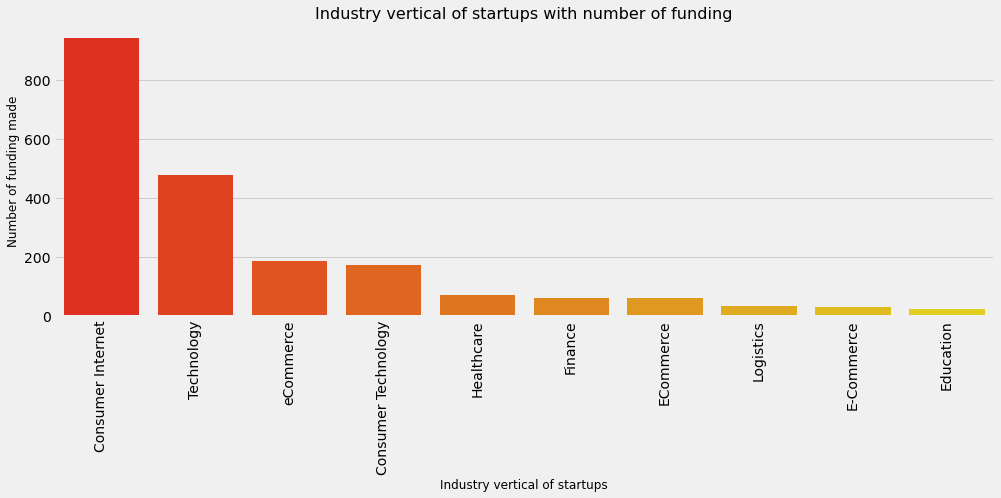

In [ ]:
#lets plot the data
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(industry.index,industry.values,palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Industry vertical of startups with number of funding',fontsize =16)
plt.show()

In [ ]:
#lets analyse the sub vertical industries
industry = data['SubVertical'].value_counts().head(20)
print(industry)

nan                                              936
Online Lending Platform                           11
Online Pharmacy                                   10
Food Delivery Platform                             8
Education                                          5
Online Lending                                     5
Online Learning Platform                           5
Online lending platform                            5
Online Education Platform                          5
Online Food Delivery                               4
Non-Banking Financial Company                      4
Fitness Mobile App                                 3
Online Furniture Store                             3
Online Food Delivery Platform                      3
Online Insurance Platform                          3
Logistics                                          3
Online platform for Higher Education Services      3
Online Insurance Aggregator                        3
B2B Marketplace                               

In [ ]:
#so i could have done this step before using the above cell ,
#observe the NAN value is present in the first index. 
industry= data['SubVertical'].value_counts()[1:].head(20)
print(industry)

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Education                                         5
Online Lending                                    5
Online Learning Platform                          5
Online lending platform                           5
Online Education Platform                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Fitness Mobile App                                3
Online Furniture Store                            3
Online Food Delivery Platform                     3
Online Insurance Platform                         3
Logistics                                         3
Online platform for Higher Education Services     3
Online Insurance Aggregator                       3
B2B Marketplace                                   3
ECommerce Marketplace                             3
E-learning  

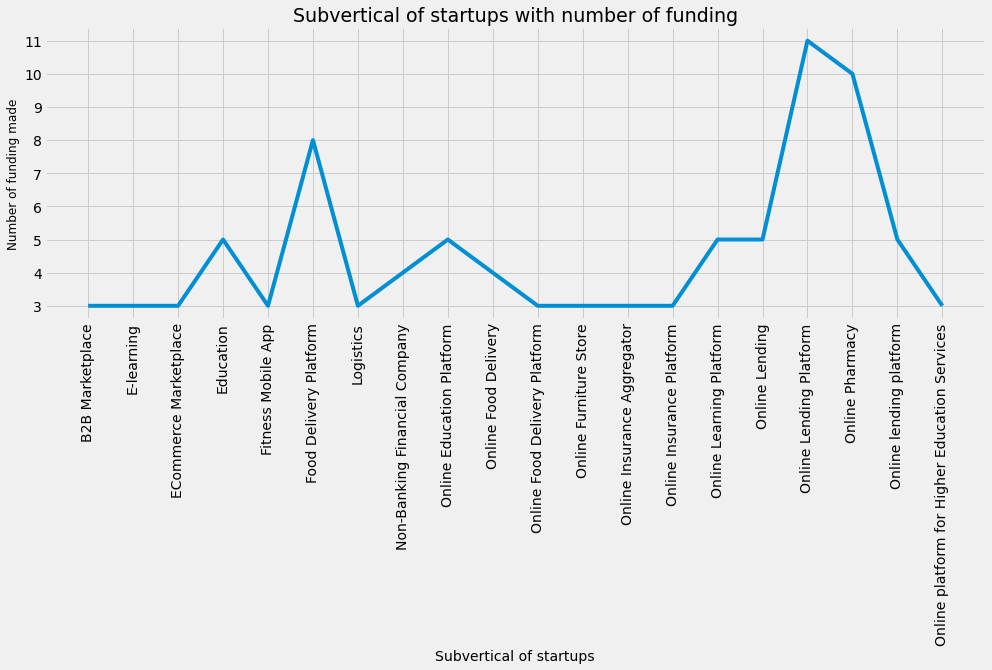

In [ ]:
#lets plot the data
sns.lineplot(industry.index,industry.values,palette= 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups',fontsize=14)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('Subvertical of startups with number of funding',fontsize=19)
plt.show()

## does location also play a role in determing th growth of a Startup ?

In [ ]:
#analysing the effect of cities on a Startup
#lets clean the data
data['City'] = data['City'].replace(('Bengaluru','nan'),('Banglore','Banglore'))

In [ ]:
city = data['City'].value_counts().head(15)
print(city)

Bangalore            701
Mumbai               568
New Delhi            424
Banglore,Banglore    321
Gurgaon              291
Pune                 105
Hyderabad             99
Chennai               97
Noida                 93
Gurugram              50
Ahmedabad             38
Delhi                 34
Jaipur                30
Kolkata               21
Indore                13
Name: City, dtype: int64


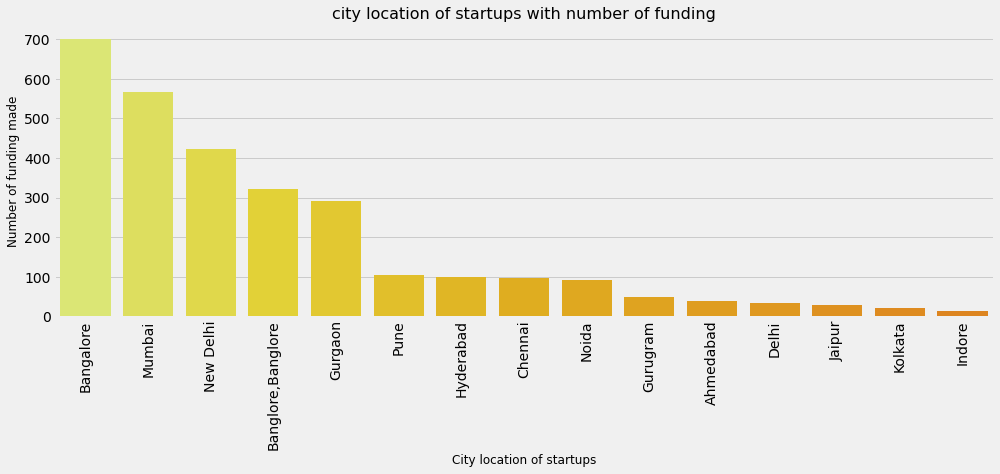

In [ ]:
#lets plot the data
sns.barplot(city.index,city.values,palette='Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('City location of startups',fontsize=12)
plt.ylabel('Number of funding made',fontsize=12)
plt.title('city location of startups with number of funding',fontsize=16)
plt.show()

In [ ]:
from wordcloud import WordCloud


In [ ]:
names= data['InvestorSName'][~pd.isnull(data['InvestorSName'])]

In [ ]:
wordcloud= WordCloud(max_font_size=50,width =500,height=300,background_color='cyan').generate(''.join(names))

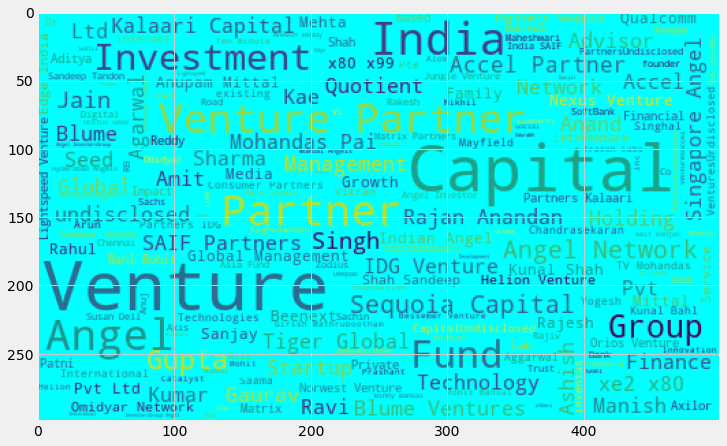

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('on')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#lets analyze the investors on startups
#lets clean the datasets
data['InvestorSName'][data['InvestorSName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorSName'][data['InvestorSName'] == 'undisclosed investors'] ='Undisclosed Investors'
data['InvestorSName'][data["InvestorSName"] == 'undisclosed investor'] = 'Undisclosed Investors'
data['InvestorSName'][data["InvestorSName"] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorSName'][data['InvestorSName'] == 'Undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorSName'][data['InvestorSName'] == 'Undisclosed'] ='Undisclosed Investors'
data['InvestorSName'][data['InvestorSName'] =='nan'] = 'Undisclosed Investors'
#probably not the best solution for this,you could research more on this. 
#usefull commits are always welcomed

In [ ]:
#lets check the value counts

investors =data['InvestorSName'].value_counts().head(15)
print(investors)

Undisclosed Investors       127
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Undisclosed Investor         12
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
RoundGlass Partners          10
SAIF Partners                10
Info Edge (India) Ltd         9
Nexus Venture Partners        9
Tiger Global                  9
Name: InvestorSName, dtype: int64


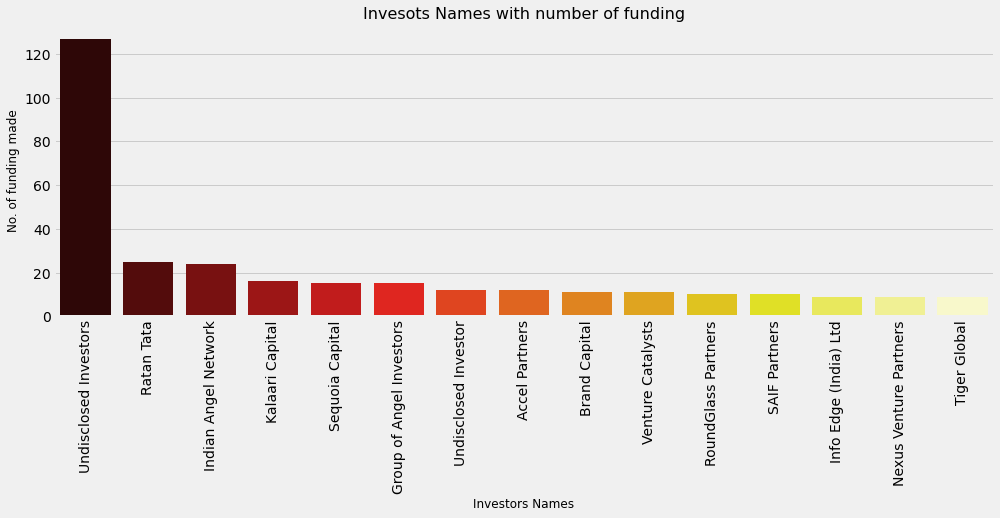

In [ ]:
#lets plot the data 
sns.barplot(investors.index,investors.values,palette='hot')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names',fontsize=12)
plt.ylabel("No. of funding made",fontsize=12)
plt.title("Invesots Names with number of funding",fontsize=16)
plt.show()

### what are the different types of funding for Startups?

In [ ]:
#lets analyze the investment
investment= data['InvestmentType'].value_counts().head(10)

In [ ]:
print(investment)

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


In [ ]:
#lets clean the datasets
data['InvestmentType'][data['InvestmentType']=='SeedFunding'] = 'Seed Funding'

In [ ]:
data['InvestmentType'][data['InvestmentType']=='Crowd funding']='Crowd Funding'
data['InvestmentType'][data['InvestmentType']=='PrivateEquity']='Private Equity'
data['InvestmentType'][data['InvestmentType']=='Seed/Angel Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed/Angel Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed / Angel Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Angel / Seed Funding']='Seed Angel Funding'


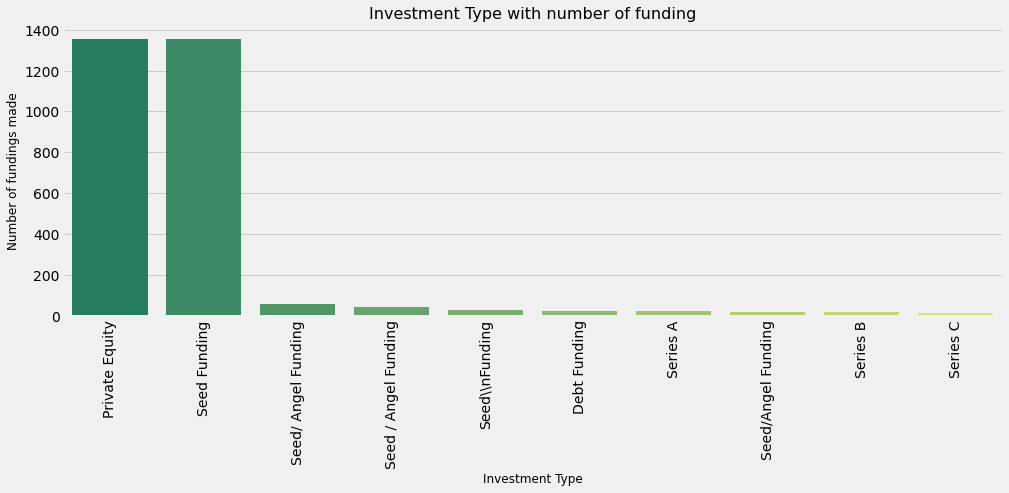

In [ ]:
#lets plot the data
sns.barplot(investment.index,investment.values,palette='summer')
plt.xticks(rotation ='vertical')
plt.xlabel('Investment Type',fontsize=12)
plt.ylabel('Number of fundings made',fontsize=12)
plt.title('Investment Type with number of funding',fontsize=16)
plt.show()

##TAKE AWAYS
 1)how EDA can give us good insights into finance data sets.
2)we learned how data visualization are the most significatnt part in providing us with quick clear understanding of the information.
3)Thanks to graphic representation we can virtualize large volumes of data into understandable and coeherent manner which in turn helps us to draw conclusion and insights.
4)DATA CLEANING
5)DATA MANIPULATION 
6)QUERY ANALYSIS
7)DATA VISUALIZATION.
WE USED {BARPLOT,LINEPLOT AND WORD CLOUD}

#DON'T GET OVERWHELMED learn to love struggle.
